In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=2bca5a0b19d55a92048e15cb341b98676e228d53f46cc9b6941b526bf8b68c95
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Define membership functions
def very_low_temp(x):
    if x <= 0:
        return 0
    elif 0 < x <= 15:
        return (15 - x) / 15
    else:
        return 0

def low_temp(x):
    if x <= 10:
        return 0
    elif 10 < x <= 20:
        return (x - 10) / 10
    elif 20 < x <= 30:
        return (30 - x) / 10
    else:
        return 0

def high_temp(x):
    if x <= 25:
        return 0
    elif 25 < x <= 30:
        return (x - 25) / 5
    elif 30 < x <= 35:
        return (35 - x) / 5
    else:
        return 0

def very_high_temp(x):
    if x <= 30:
        return 0
    elif 30 < x <= 45:
        return (x - 30) / 15
    else:
        return 0

def dry_humidity(x):
    if x <= 0:
        return 0
    elif 0 < x <= 30:
        return (30 - x) / 30
    else:
        return 0

def comfortable_humidity(x):
    if x <= 20:
        return 0
    elif 20 < x <= 35:
        return (x - 20) / 15
    elif 35 < x <= 50:
        return (50 - x) / 15
    else:
        return 0

def humid_humidity(x):
    if x <= 40:
        return 0
    elif 40 < x <= 55:
        return (x - 40) / 15
    elif 55 < x <= 70:
        return (70 - x) / 15
    else:
        return 0

def sticky_humidity(x):
    if x <= 60:
        return 0
    elif 60 < x <= 80:
        return (x - 60) / 20
    else:
        return 0

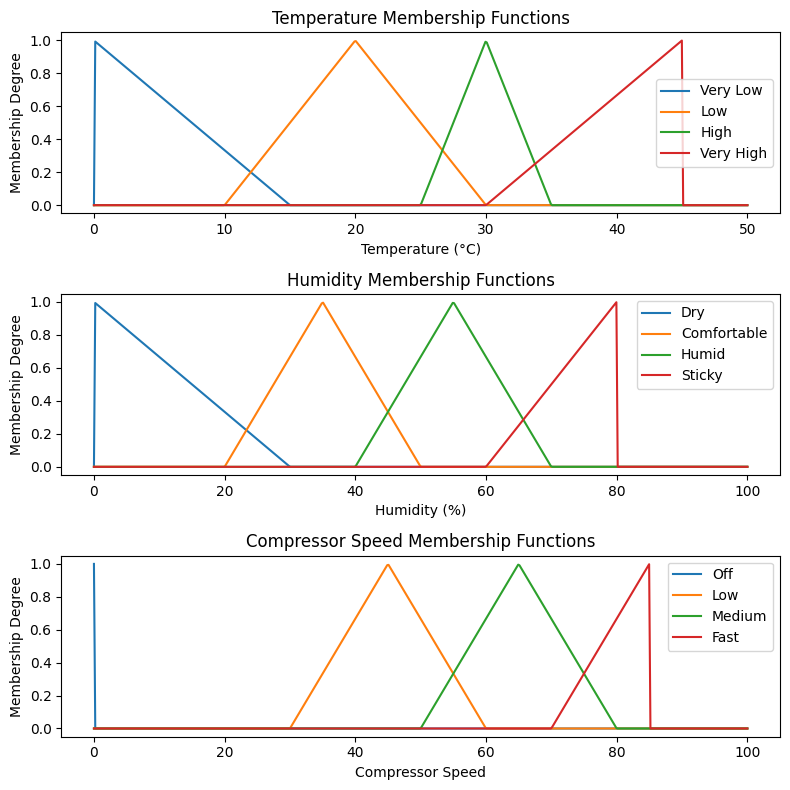

In [ ]:
# Define the range for the x-axis
x_temp = np.linspace(0, 50, 500)
x_humidity = np.linspace(0, 100, 500)
x_speed = np.linspace(0, 100, 500)

# Calculate membership values for temperature
vl_temp_values = [very_low_temp(x) for x in x_temp]
l_temp_values = [low_temp(x) for x in x_temp]
h_temp_values = [high_temp(x) for x in x_temp]
vh_temp_values = [very_high_temp(x) for x in x_temp]

# Calculate membership values for humidity
dry_humidity_values = [dry_humidity(x) for x in x_humidity]
comfortable_humidity_values = [comfortable_humidity(x) for x in x_humidity]
humid_humidity_values = [humid_humidity(x) for x in x_humidity]
sticky_humidity_values = [sticky_humidity(x) for x in x_humidity]

# Calculate membership values for compressor speed
off_speed_values = [off_speed(x) for x in x_speed]
low_speed_values = [low_speed(x) for x in x_speed]
medium_speed_values = [medium_speed(x) for x in x_speed]
fast_speed_values = [fast_speed(x) for x in x_speed]

# Plot membership functions for temperature
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(x_temp, vl_temp_values, label='Very Low')
plt.plot(x_temp, l_temp_values, label='Low')
plt.plot(x_temp, h_temp_values, label='High')
plt.plot(x_temp, vh_temp_values, label='Very High')
plt.title('Temperature Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()

# Plot membership functions for humidity
plt.subplot(3, 1, 2)
plt.plot(x_humidity, dry_humidity_values, label='Dry')
plt.plot(x_humidity, comfortable_humidity_values, label='Comfortable')
plt.plot(x_humidity, humid_humidity_values, label='Humid')
plt.plot(x_humidity, sticky_humidity_values, label='Sticky')
plt.title('Humidity Membership Functions')
plt.xlabel('Humidity (%)')
plt.ylabel('Membership Degree')
plt.legend()

# Plot membership functions for compressor speed
plt.subplot(3, 1, 3)
plt.plot(x_speed, off_speed_values, label='Off')
plt.plot(x_speed, low_speed_values, label='Low')
plt.plot(x_speed, medium_speed_values, label='Medium')
plt.plot(x_speed, fast_speed_values, label='Fast')
plt.title('Compressor Speed Membership Functions')
plt.xlabel('Compressor Speed')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Rule base
rule_base = {
    ("Very Low Temp", "Dry Humidity"): "Off",
    ("Very Low Temp", "Comfortable Humidity"): "Off",
    ("Very Low Temp", "Humid Humidity"): "Off",
    ("Very Low Temp", "Sticky Humidity"): "Low",
    ("Low Temp", "Dry Humidity"): "Off",
    ("Low Temp", "Comfortable Humidity"): "Off",
    ("Low Temp", "Humid Humidity"): "Low",
    ("Low Temp", "Sticky Humidity"): "Medium",
    ("High Temp", "Dry Humidity"): "Low",
    ("High Temp", "Comfortable Humidity"): "Medium",
    ("High Temp", "Humid Humidity"): "Fast",
    ("High Temp", "Sticky Humidity"): "Fast",
    ("Very High Temp", "Dry Humidity"): "Medium",
    ("Very High Temp", "Comfortable Humidity"): "Fast",
    ("Very High Temp", "Humid Humidity"): "Fast",
    ("Very High Temp", "Sticky Humidity"): "Fast",
}

In [ ]:
# Membership functions for speeds
def off_speed(x):
    return 1 if x == 0 else 0

def low_speed(x):
    if x <= 30:
        return 0
    elif 30 < x <= 45:
        return (x - 30) / 15
    elif 45 < x <= 60:
        return (60 - x) / 15
    else:
        return 0

def medium_speed(x):
    if x <= 50:
        return 0
    elif 50 < x <= 65:
        return (x - 50) / 15
    elif 65 < x <= 80:
        return (80 - x) / 15
    else:
        return 0

def fast_speed(x):
    if x <= 70:
        return 0
    elif 70 < x <= 85:
        return (x - 70) / 15
    else:
        return 0

In [ ]:
# Data sampling
temperatures = [11, 14, 28, 28]
humidities = [31, 43, 41, 47]

In [ ]:
# Fuzzification results
results = []
for temp, hum in zip(temperatures, humidities):
    mu_vl_temp = very_low_temp(temp)
    mu_l_temp = low_temp(temp)
    mu_h_temp = high_temp(temp)
    mu_vh_temp = very_high_temp(temp)

    mu_d_hum = dry_humidity(hum)
    mu_c_hum = comfortable_humidity(hum)
    mu_h_hum = humid_humidity(hum)
    mu_s_hum = sticky_humidity(hum)

    results.append({
        "Temperature": temp,
        "Humidity": hum,
        "Very Low Temp": mu_vl_temp,
        "Low Temp": mu_l_temp,
        "High Temp": mu_h_temp,
        "Very High Temp": mu_vh_temp,
        "Dry Humidity": mu_d_hum,
        "Comfortable Humidity": mu_c_hum,
        "Humid Humidity": mu_h_hum,
        "Sticky Humidity": mu_s_hum
    })

df_results = pd.DataFrame(results)

In [ ]:
# Tsukamoto method
def get_speed_membership(speed, x):
    if speed == "Off":
        return off_speed(x)
    elif speed == "Low":
        return low_speed(x)
    elif speed == "Medium":
        return medium_speed(x)
    elif speed == "Fast":
        return fast_speed(x)

def get_rule_output_and_membership(temp_label, hum_label, membership_values):
    rule_output = rule_base.get((temp_label, hum_label))
    if rule_output:
        temp_membership = membership_values[temp_label]
        hum_membership = membership_values[hum_label]
        return rule_output, min(temp_membership, hum_membership)
    return None, 0

def defuzzify_speed(membership_values):
    outputs = {"Off": 0, "Low": 0, "Medium": 0, "Fast": 0}

    for temp_label in ["Very Low Temp", "Low Temp", "High Temp", "Very High Temp"]:
        for hum_label in ["Dry Humidity", "Comfortable Humidity", "Humid Humidity", "Sticky Humidity"]:
            rule_output, membership = get_rule_output_and_membership(temp_label, hum_label, membership_values)
            if rule_output:
                outputs[rule_output] = max(outputs[rule_output], membership)

    numerator = 0
    denominator = 0
    for speed in outputs:
        for x in range(101):
            membership_value = get_speed_membership(speed, x)
            weighted_membership = min(outputs[speed], membership_value)
            numerator += x * weighted_membership
            denominator += weighted_membership

    if denominator == 0:
        return 0
    return numerator / denominator


In [ ]:
def tsukamoto_method(temp, hum):
    # Fuzzification
    mu_vl_temp = very_low_temp(temp)
    mu_l_temp = low_temp(temp)
    mu_c_hum = comfortable_humidity(hum)
    mu_h_hum = humid_humidity(hum)

    # Inference
    # Rule 1
    alpha_1 = min(mu_vl_temp, mu_c_hum)
    Z_1 = 0

    # Rule 2
    alpha_2 = min(mu_vl_temp, mu_h_hum)
    Z_2 = 0

    # Rule 3
    alpha_3 = min(mu_l_temp, mu_c_hum)
    Z_3 = 0

    # Rule 4
    alpha_4 = min(mu_l_temp, mu_h_hum)
    Z_4 = 45.99

    # Defuzzification
    numerator = (alpha_1 * Z_1) + (alpha_2 * Z_2) + (alpha_3 * Z_3) + (alpha_4 * Z_4)
    denominator = alpha_1 + alpha_2 + alpha_3 + alpha_4

    if denominator == 0:
        return 0
    return numerator / denominator



In [ ]:
# Apply the Tsukamoto method for all data samples
tsukamoto_results = []
for temp, hum in zip(temperatures, humidities):
    speed = tsukamoto_method(temp, hum)
    tsukamoto_results.append({
        "Temperature": temp,
        "Humidity": hum,
        "Compressor Speed": speed
    })

df_tsukamoto_results = pd.DataFrame(tsukamoto_results)

# Display results
print("Fuzzification Results:")
print(df_results)

print("\nTsukamoto Method Compressor Speed Results:")
print(df_tsukamoto_results)

Fuzzification Results:
   Temperature  Humidity  Very Low Temp  Low Temp  High Temp  Very High Temp  \
0           11        31       0.266667       0.1        0.0               0   
1           14        43       0.066667       0.4        0.0               0   
2           28        41       0.000000       0.2        0.6               0   
3           28        47       0.000000       0.2        0.6               0   

   Dry Humidity  Comfortable Humidity  Humid Humidity  Sticky Humidity  
0             0              0.733333        0.000000                0  
1             0              0.466667        0.200000                0  
2             0              0.600000        0.066667                0  
3             0              0.200000        0.466667                0  

Tsukamoto Method Compressor Speed Results:
   Temperature  Humidity  Compressor Speed
0           11        31          0.000000
1           14        43         12.542727
2           28        41         11.49